In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# /content/drive/My Drive/ = 구글 드라이브(내 드라이브) 경로

!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'

-rw------- 1 root root 69155672 Mar  9 02:39 '/content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip'


# 2, Data Preprocessing

## 1) Unzip 'creditCardFraud.zip'

In [3]:
 !unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/creditCardFraud.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/creditCardFraud.zip
  inflating: creditcard.csv          


In [4]:
!ls -l

total 147304
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
drwx------ 5 root root      4096 Mar 18 12:20 drive
drwxr-xr-x 1 root root      4096 Mar  5 14:37 sample_data


## 2) 데이터 읽어오기

In [5]:
import numpy as np

In [6]:
%%time
import pandas as pd

DF = pd.read_csv('creditcard.csv')
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
DF.drop('Time', axis=1, inplace=True)
DF.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]
X.shape, y.shape

((284807, 29), (284807,))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2045,
                                                    stratify = y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

In [12]:
from keras import models
from keras import layers

Model = models.Sequential()

Model.add(layers.Dense(10, activation='relu', input_shape=(29,)))
Model.add(layers.Dense(7, activation='relu'))
Model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


In [21]:
Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall'])

In [22]:
History = Model.fit(X_train, y_train,
          epochs=1000,
          batch_size=1024,
          validation_data=(X_test, y_test))

Epoch 1/1000
195/195 [==============================] - 1s 4ms/step - loss: 0.3446 - recall: 0.0796 - val_loss: 0.0489 - val_recall: 0.0270
Epoch 2/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0466 - recall: 0.0678 - val_loss: 0.0151 - val_recall: 0.1284
Epoch 3/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0164 - recall: 0.1612 - val_loss: 0.0078 - val_recall: 0.2297
Epoch 4/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0121 - recall: 0.2209 - val_loss: 0.0051 - val_recall: 0.3108
Epoch 5/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0066 - recall: 0.2818 - val_loss: 0.0040 - val_recall: 0.3649
Epoch 6/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0047 - recall: 0.3354 - val_loss: 0.0040 - val_recall: 0.3716
Epoch 7/1000
195/195 [==============================] - 0s 2ms/step - loss: 0.0054 - recall: 0.3401 - val_loss: 0.0037 - val_recall: 0.3851
Epoch 8/1000
195/195

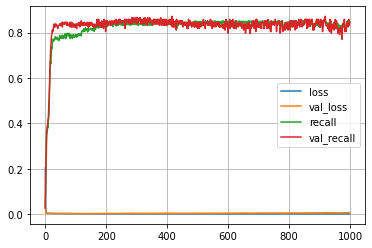

In [25]:
import matplotlib.pyplot as plt

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.plot(History.history['recall'])
plt.plot(History.history['val_recall'])
plt.legend(['loss','val_loss','recall','val_recall'])
plt.grid()
plt.show()

In [27]:
loss, Recall = Model.evaluate(X_test, y_test)

2671/2671 [==============================] - 2s 879us/step - loss: 0.0070 - recall: 0.8446


In [30]:
y_hat = np.argmax(Model.predict(X_test), axis=1)
y_hat

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
y_test

187634    0
39187     0
15772     0
269001    0
167946    0
         ..
100517    0
157245    0
123023    0
163744    0
190453    0
Name: Class, Length: 85443, dtype: int64

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_hat)

array([[85295,     0],
       [  148,     0]])

In [37]:
classification_report(y_test, y_hat,
                      target_names=['0','1'])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     85295\n           1       0.00      0.00      0.00       148\n\n    accuracy                           1.00     85443\n   macro avg       0.50      0.50      0.50     85443\nweighted avg       1.00      1.00      1.00     85443\n'